**Run the following two cells before you begin.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%autosave 10

Autosaving every 10 seconds


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [ ]:
# Import the data set
df = pd.read_csv('/content/drive/My Drive/Technocolabs project/cleaned_data.csv')


In [ ]:
# Define the sigmoid function
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


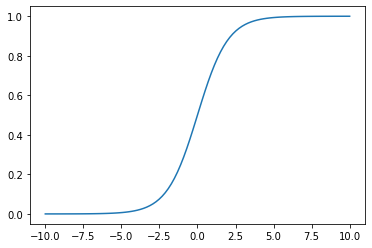

In [ ]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [ ]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


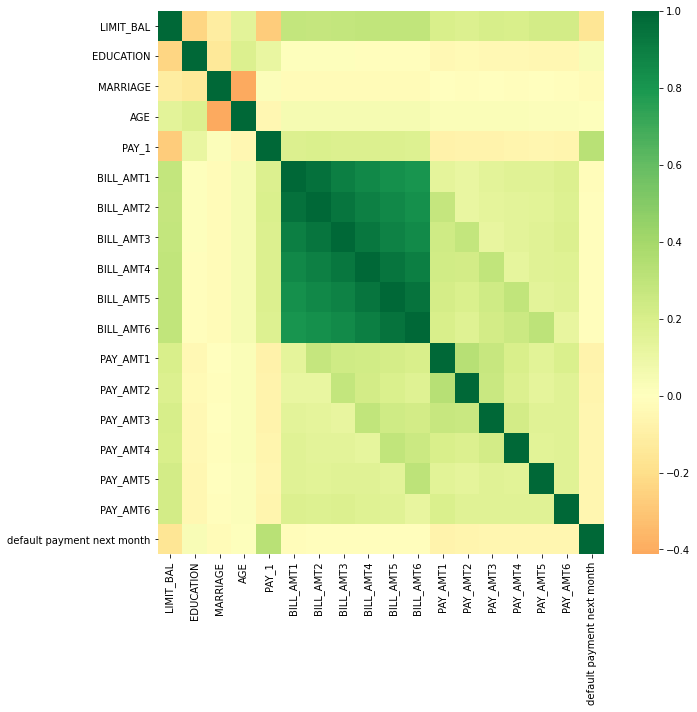

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0, cmap='RdYlGn')
plt.show()


**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [ ]:
# Create a train/test split
X = df[['PAY_1', 'LIMIT_BAL']]
Y = df['default payment next month']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=24, test_size=0.2)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [ ]:
# Fit the logistic regression model on training data
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions using `.predict()`
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Find class probabilities using `.predict_proba()`
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [ ]:
# Add column of 1s to features
ones = np.ones((X_test.shape[0],1))
feats = np.hstack([ones, X_test])
print(ones)
print('\n', X_test)
print(feats)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]

        PAY_1  LIMIT_BAL
14306      2     160000
2978       1      50000
16641     -1     200000
18580      3     200000
131        1      50000
...      ...        ...
18160      0     140000
19779     -1      50000
6666      -1      50000
18990      1     230000
23253      2     100000

[5333 rows x 2 columns]
[[ 1.0e+00  2.0e+00  1.6e+05]
 [ 1.0e+00  1.0e+00  5.0e+04]
 [ 1.0e+00 -1.0e+00  2.0e+05]
 ...
 [ 1.0e+00 -1.0e+00  5.0e+04]
 [ 1.0e+00  1.0e+00  2.3e+05]
 [ 1.0e+00  2.0e+00  1.0e+05]]


In [ ]:
# Get coefficients and intercepts from trained model
model_coeff = model.coef_
model_intercepts = model.intercept_

print('\n', model_intercepts)
print(model_coeff)


 [-6.57647457e-11]
[[ 8.27451187e-11 -6.80876727e-06]]


In [ ]:
# Manually calculate predicted probabilities
coeff_inter_feats = np.concatenate([model_intercepts.reshape(1,1),model_coeff], axis=1)
coeff_inter_feats
manual_proba = np.dot(coeff_inter_feats,np.transpose(feats))
manual_proba = sigmoid(manual_proba)
manual_proba

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [ ]:
# Manually calculate predicted classes
y_pred_manual = manual_proba > 0.5
y_pred_manual.shape

(1, 5333)

In [ ]:
# Compare to scikit-learn's predicted classes
y_pred.shape
np.array_equal(y_pred_manual, y_pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [ ]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob[:,1])

0.627207450280691

In [ ]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(y_test, manual_proba.reshape(manual_proba.shape[1],))

0.627207450280691